# Defacing pre-registration - Statistical analysis on manual ratings in R

## Load simulated manual ratings

In [4]:
import rdata

parsed = rdata.parser.parse_file("SimulatedData/SimulatedDefacedRatings_4raters_bias.Rda")
df_long = rdata.conversion.convert(parsed)
df_long

df_wide = df_long.pivot(index=['sub','defaced'], columns='rater',values='ratings')
print(df_wide)

ModuleNotFoundError: No module named 'rdata'

The simulated data were generated by running the `simulate_data.R` function.

## t-distributed Stochastic Neighbor Embedding (t-SNE)

In [67]:
##Fit t-SNE

from sklearn.manifold import TSNE
import pandas as pd

tsne_proj = TSNE().fit_transform(df_wide.to_numpy())

df_emb = pd.DataFrame()
df_emb['x'] = tsne_proj[:, 0]
df_emb['y'] = tsne_proj[:, 1]

tsne_proj.shape

/home/cprovins/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/cprovins/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1160, 2)

In [68]:
df_emb.x

0      -37.403126
1      -37.403748
2        8.935520
3        8.061197
4       17.835793
          ...    
1155     5.599525
1156     7.777232
1157    10.142311
1158     2.887248
1159     4.704650
Name: x, Length: 1160, dtype: float32

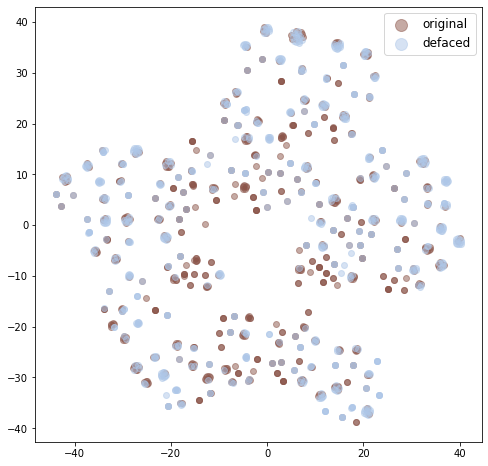

"# Plot those points as a scatter plot and label them based on the pred labels\ncmap = cm.get_cmap('tab20')\nfig, ax = plt.subplots(figsize=(8,8))\nnum_categories = 8\nfor lab in range(num_categories):\n    indices = test_predictions==lab\n    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], , label = lab ,alpha=0.5)\nax.legend(fontsize='large', markerscale=2)\nplt.show()"

In [70]:
##Visualize embeddings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df_emb.x[0::2], df_emb.y[0::2], alpha=.5, c=np.array(cmap(10)).reshape(1,4), label = 'original')
ax.scatter(df_emb.x[1::2], df_emb.y[1::2], alpha=.5, c=np.array(cmap(1)).reshape(1,4), label = 'defaced')
ax.legend(fontsize='large', markerscale=2)
plt.show()


"""# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 8
for lab in range(num_categories):
    indices = test_predictions==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], , label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()"""